# DS-SF-25 | Unit Project 2: Exploratory Data Analysis - Gilbert Zhang

## Libraries and data load

In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

## Data Overview

In [3]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [4]:
# Number of observations
df.shape[0]

400

In [5]:
df.describe()

/Users/gyzhang328/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


## NaN Drop

In [6]:
df[df.admit.isnull()]

,admit,gre,gpa,prestige


In [7]:
df[df.gre.isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [8]:
df[df.gpa.isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


In [9]:
df[df.prestige.isnull()]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


In [10]:
# from above we know that there are three observations which have NaN in either gre, gpa or prestige.
# Number of observations with NaN values is small - we will drop all of them.
df=df.dropna()

In [11]:
# To check if NaN is dropped
df[df.isnull()].count()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

## Descriptive Statistics 

In [12]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


## Data Distribution

> Admit Distribution:
  This is a nominal variable with two values available - '1' represents admitted while '0' represents not admitted. Of all 397 observations, 271 with a value of '0' (68%), 126 with a value of '1' (32%). (3 observations are dropped)

In [13]:
df.admit.describe()

count    397.000000
mean       0.317380
std        0.466044
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: admit, dtype: float64

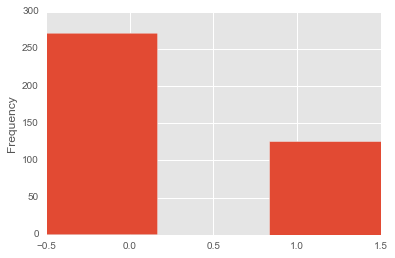

In [14]:
df.admit.plot(kind = 'hist', range = (-0.5, 1.5), bins = 3)

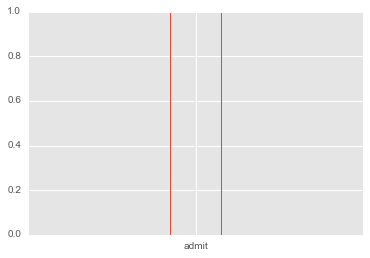

In [15]:
df.admit.plot(kind = 'box')

In [16]:
df.admit.value_counts()

0    271
1    126
Name: admit, dtype: int64

> GRE Distribution:
  This is a ratio variable with values ranging from 220 to 800, a mean of around 588 and a median of 580. 75% of the value are between 520 and 800. The distribution is skewed to the left with observations (25%) scattered between 220 and 520. IQR is calculated as 140 - there is no observation exceeding 'Q3 + IQR*1.5' while there are 4 observations lower than the 'Q1 - IQR*1.5' bound.

In [17]:
df.gre.describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

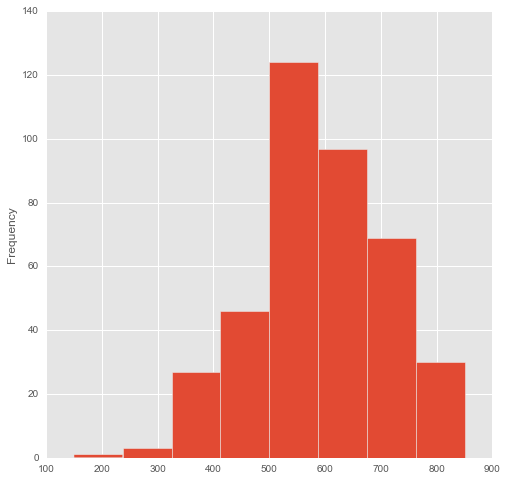

In [18]:
df.gre.plot(kind = 'hist', range = (150, 850), bins = 8, figsize = (8, 8))

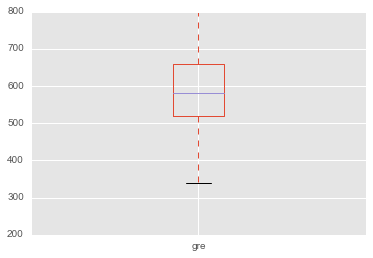

In [19]:
df.gre.plot(kind = 'box')

In [20]:
df.gre.value_counts()

620.0    30
580.0    28
540.0    27
800.0    25
520.0    24
         ..
760.0     5
340.0     4
360.0     4
300.0     3
220.0     1
Name: gre, dtype: int64

In [21]:
# Outlier range
IQR = df.gre.quantile(0.75) - df.gre.quantile(0.25)
print IQR
print df.gre.quantile(0.75) +1.5*IQR
print df.gre.quantile(0.25) -1.5*IQR

140.0
870.0
310.0


In [22]:
df.gre[df.gre<310].count()

4

> GPA Distribution:
  This is a ratio variable with values ranging from 2.26 to 4.0, a mean of around 3.39 and a median of 3.4. 75% of the value are between 3.13 and 4.00. The distribution is slightly skewed to the left with observations (25%) scattered between 2.26 and 3.13. IQR is calculated as 0.54 - there is no observation exceeding 'Q3 + IQR*1.5' while there is 1 observation lower than the 'Q1 - IQR*1.5' bound. The mode for this variable is 4.0 (28 observations). Compared to gre, gpa seems to have a lower measure of dispersion.

In [23]:
df.gpa.describe()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

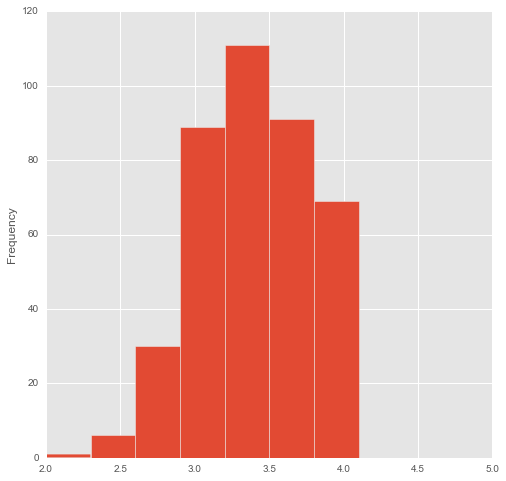

In [24]:
df.gpa.plot(kind = 'hist', range = (2, 5), figsize = (8, 8))

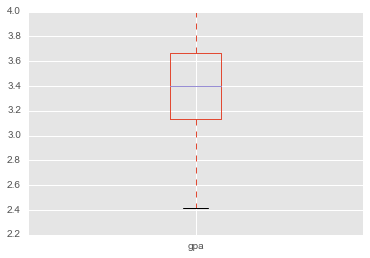

In [25]:
df.gpa.plot(kind = 'box')

In [26]:
df.gpa.value_counts()

4.00    28
3.31     8
3.45     7
3.40     7
3.35     7
        ..
2.48     1
3.42     1
2.73     1
3.09     1
2.83     1
Name: gpa, dtype: int64

In [27]:
# Outlier range
IQR = df.gpa.quantile(0.75) - df.gpa.quantile(0.25)
print IQR
print df.gpa.quantile(0.75) +1.5*IQR
print df.gpa.quantile(0.25) -1.5*IQR

0.54
4.48
2.32


In [28]:
df.gpa[df.gpa<2.32].count()

1

In [29]:
# Work below is just a drill-down of the applicants with 4.0 GPA out of curiosity. Not related to the assignment.
df_4point0=df[df.gpa== 4.00]

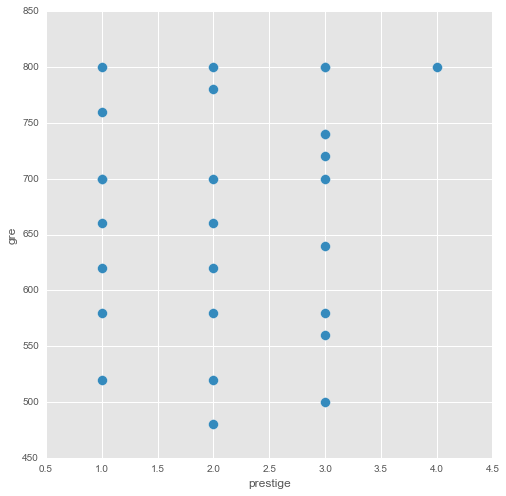

In [30]:
df_4point0.plot(kind = 'scatter', x = 'prestige', y = 'gre', s = 100, figsize = (8, 8))

> Prestige Distribution:
  This is a ordinal variable with four values available - '1' represents highest prestige of an applicant alta mater and '4' as lowest. Of all 397 observations, 61 with a value of '1' (15%), 148 with a value of '1' (37%), 121 with a value of '3' (31%), 67 with a value of '4' (17%). About 68% of the observations with a pretige of 2 or 3.

In [31]:
df.prestige.describe()

count    397.000000
mean       2.488665
std        0.947083
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: prestige, dtype: float64

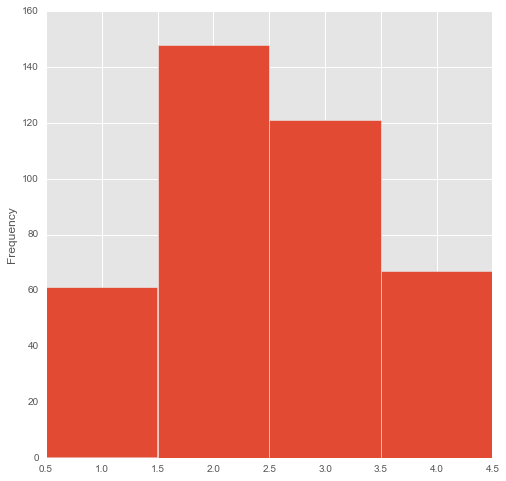

In [32]:
m = int(math.ceil(df.prestige.max()))
df.prestige.plot(kind = 'hist', range = (0.5, m + 0.5), bins = m, figsize = (8, 8))

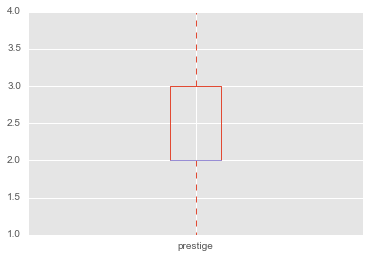

In [33]:
df.prestige.plot(kind = 'box')

In [34]:
df.prestige.value_counts()

2.0    148
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64

In [35]:
df.prestige[(df.prestige == 2) | (df.prestige ==3)].count()/float(397)

0.67758186397984888

## Correlation Table (Question 10 in the starter)

In [36]:
#covariance
df.cov()

,admit,gre,gpa,prestige
admit,0.217197,9.772155,0.030852,-0.107505
gre,9.772155,13390.606315,16.824761,-13.648068
gpa,0.030852,16.824761,0.144558,-0.021957
prestige,-0.107505,-13.648068,-0.021957,0.896967


In [37]:
#correlation
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


## Issues and Limitations (Question 9 & 11)

> Observation size and NaN observations: the sample size is decent with roughly 400 and only three of them don't have value. Dropping them will not significantly impact our analysis.

> Data Distribution and Outliers: Neither gre nor gpa is a normal distribution. Both of them are skewed to the left with most values concentrated relatively on the right side. If we assume that the population follows a normal distribution, we are likely to trigger biases in our model. I don't think we can correct the distribution without altering the data points. But by altering the observations (dropping assumed in this case), we might create even more biases. There are 4 outliers for gre and 1 outlier for gpa. We can consider dropping them but have to be careful of the impact on our analysis.

> Covariance/Correlation interpretation: gre and gpa are both positively correlated with admit while prestige is negatively correlated with admit. This results means keeping others variables constant, an applicant with higher gpa or gre or a better prestige of their altar mater.

> Collinearity: gpa and gre seems to be positively correlated with each other (a correlation of 0.38). Also, gre is negatively correlated with prestige (-0.12). These collinearity might post potential biases in our multiple linear regression model.

## Graduate school admission rates and prestige of undergraduate schools (Question 12 &13)

> Explanatory Analysis Plan:

In [46]:
#Step 1: Understand the the number of observations for both variables

In [42]:
pd.crosstab(df.admit, df.prestige)

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [ ]:
#Step 2: Understand the overall admission rate for all prestiges.

In [44]:
print 'the overall admit rate ' + str(i) + ' is ' + str(df[(df.admit == 1)].shape[0]/float(397))

the overall admit rate 5 is 0.317380352645


In [38]:
#Step 3: Understand the admission rate for each prestige.

In [40]:
i=1
while i <5:
    print 'the admit rate for prestige ' + str(i) + ' is ' + str(df[(df.admit == 1) & (df.prestige ==i)].shape[0]/float(df[(df.prestige ==i)].shape[0]))
    i+=1

the admit rate for prestige 1 is 0.540983606557
the admit rate for prestige 2 is 0.358108108108
the admit rate for prestige 3 is 0.231404958678
the admit rate for prestige 4 is 0.179104477612


In [47]:
#Step 4: Understand the correlation between the two variables

In [54]:
df[['admit', 'prestige']].corr()

,admit,prestige
admit,1.000000,-0.243563
prestige,-0.243563,1.000000


> Hypothesis: The admission is higher for applicants with high prestige (lower prestige value).